# Nest simulator introduction 

In [1]:
import nest
import numpy as np
import matplotlib.pyplot as plt


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.5
 Built: Jul 12 2023 08:11:34

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
%matplotlib inline

In [3]:
# list of personalized params 
ndict = {"I_e": 200.0, "tau_m": 20.0}
# create neural population with specific model and params
neuronpop = nest.Create("iaf_psc_alpha", 100, params=ndict)

In [4]:
# define two lists of params for excitatory and inhibitory population

# excitatory
edict = {"I_e": 200.0, "tau_m": 20.0}
nest.CopyModel("iaf_psc_alpha", "exc_iaf_psc_alpha")
nest.SetDefaults("exc_iaf_psc_alpha", edict)

# inhibitory
idict = {"I_e": 300.0}
nest.CopyModel("iaf_psc_alpha", "inh_iaf_psc_alpha", params=idict)

In [5]:
# create one exc pop and one inh pop
epop1 = nest.Create("exc_iaf_psc_alpha", 100)
ipop1 = nest.Create("inh_iaf_psc_alpha", 30)

In [6]:
# params can also be randomized for each neuron in the population
Vth=-55.
Vrest=-70.
dVms =  {"V_m": [Vrest+(Vth-Vrest)*np.random.rand() for x in range(len(epop1))]}
epop1.set(dVms)

In [7]:
# populations must be connected each other

# set synaptic parameters
d = 1.0  #synaptic delay
Je = 2.0 # exc weight
Ke = 20  # exc indegree
Ji = -4.0  # inh weight
Ki = 12  # inh indegree

#set connection rule between populations
conn_dict_ex = {"rule": "fixed_indegree", "indegree": Ke}
conn_dict_in = {"rule": "fixed_indegree", "indegree": Ki}

# final synapitc settings
syn_dict_ex = {"delay": d, "weight": Je}
syn_dict_in = {"delay": d, "weight": Ji}
nest.Connect(epop1, ipop1, conn_dict_ex, syn_dict_ex)
nest.Connect(ipop1, epop1, conn_dict_in, syn_dict_in)

In [8]:
# neuronal activity can be recorded using different devices

# set recording devices params
multimeters_e = nest.Create("multimeter", 100)
multimeters_e.set({"record_from":["V_m"]})

sr=nest.Create('spike_recorder',100)

# connect devices to a population
nest.Connect(multimeters_e,epop1,'one_to_one')
nest.Connect(epop1,sr)

In [9]:
nest.Simulate(1000)


Dec 15 05:00:24 NodeManager::prepare_nodes [Info]: 
    Preparing 430 nodes for simulation.

Dec 15 05:00:24 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 430
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Dec 15 05:00:24 SimulationManager::run [Info]: 
    Simulation finished.


In [10]:
# get results
results_multi = multimeters_e.get()
results_sr = sr.get()

In [11]:
evs_multi = results_multi['events']
evs_sr = results_sr['events']

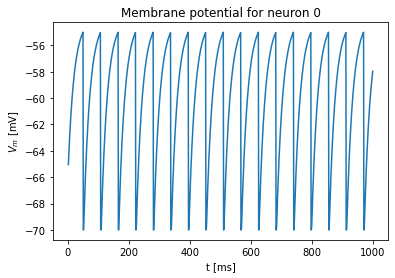

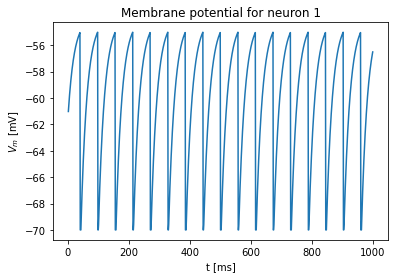

In [12]:
# plot the first 2 neuronal activity on time 
for i in range(2):
    plt.plot(evs_multi[i]['times'],evs_multi[i]['V_m'])
    plt.title('Membrane potential for neuron '+str(i))
    plt.xlabel('t [ms]')
    plt.ylabel(r'$V_m$ [mV]')
    plt.show()



In [13]:
# plot raster for the population
senders = [evs_sr[i]['senders'] for i in range(len(ipop1))]
times = [evs_sr[i]['times'] for i in range(len(ipop1))]

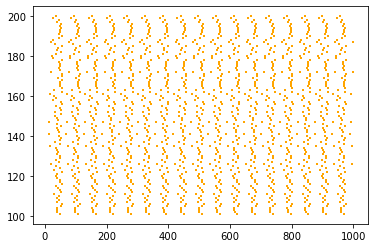

In [18]:
plt.scatter(times,senders, marker='|',s=3, color ='orange')